In [20]:
import numpy as np
import scipy.constants as sc
import matplotlib.pyplot as plt 

######## From the "On the design of precision nanomedicines" paper:
# hpo = brush heigh of PEG brush on a planar surface
# y = packing factor according to Zhulina et. al
# hp = brush heigh of the polymer brush
# G0 = G0ij (-lnp0 and kD), [between equations 8 and 9]
# Gmob = configurational contribution due to the mobility of the receptors
# GPEO = configurational contribution due to the fact the receptor needs to penetrate the PEG brush
# Gcnf = total configurational contribution due to the constraints imposed by binding
# G = total bond energy (already unitless due to Gcnf and G0 being divided by kT)
# chi = exponent of -G
# pL = the probability that a ligand(receptor) is unbound (pR is similar) - supplementary information
# bEbond = avidity bond energy divided by kT, free energy due to bond formation, summed over all 
#.          possible bonding combinations
# bUg = steric component of the glycocalyx
# theta = surface coverage

def hpo(Npeo, Apeo, o0):
    return Npeo*((((Apeo)**5)/(3*o0))**1/3)
def y(hpo, R):
    return (hpo/R + 1)**2
def hp(R, Npeo, Apeo, o0, y):
    return R * ((1 + ((y + 2) * Npeo) / (3 * R) * ((Apeo**5) / (3 * o0))**(1/3)) ** (3/(y+2)) - 1)
def G0(KD):
    return -np.log(10**9 / KD)
def Gmob(dp, hp):
    return -np.log((2*np.pi*(hp*dp)**2)/400000000)
def GPEO(Vp, o0, y, Npeo, Apeo, dp, R):
    return (1-(dp)**2)**(9/4) * Vp * (o0*((1+dp*(1+((Npeo*(y+2))/(3*R))*(Apeo**5/(3*o0))**(1/3))**(3/y+2))-1)**(y-1))**(-3/2) 
def Gcnf(Gmob, GPEO):
    return Gmob + GPEO 
def G(G0, Gcnf):
    return G0 + Gcnf
def chi(G):
    return np.exp(-G)
def pL(nL, nR, chi):
    return ((nL - nR)*chi - 1 + np.sqrt((4*nL*chi)+(1+(nR-nL)*chi)**2))/(2*nL*chi)
def pR(nL, nR, chi):
    return ((nR - nL)*chi - 1 + np.sqrt((4*nR*chi)+(1+(nL-nR)*chi)**2))/(2*nR*chi)
def bEbond(nL, nR, pL, pR):
    return nL*(np.log(pL) + (1-pL)/2) + nR*(np.log(pR) + (1-pR)/2)
def oHS(ds):
    return (np.pi/24)*(ds)**2
def bUg(R, dG, oHS):
    return ((4*np.pi*(R**3))*(1-dG**2)**(9/4)) / (3 * (oHS**1.5))
def theta(P, R, dp, hp, bUg, bEbond):                      
    return (3 / (np.pi * P * sc.N_A * (3 * (R +(dp*hp))**3 - R**3) * 
                 np.exp(-bUg) * (np.exp(-bEbond) - 1)) + 1)**-1  
            
def logT(theta):
    return np.log(theta)



In [21]:
##### Constants to input #####

P = 10**-24   #### Input concentration here (mol/nm^3)
Npeo = 113    #### Input number of PEG monomer here (degree of polymerisation of the PEG brush)
Apeo = 0.35   #### Input the size of the monomer (size of the PEG monomer is always 0.35nm)
nR = 18       #### Input the number of receptors on the BECs (leave at 18 molecules per um^-2)
KD = 313      #### Input the dissociation constant of the ligand (in nM - leave as 313 for
              #### the dissociation constant for Angiopep2
Vp = 188.4    #### Input the receptor volume (nm3)
dG = 0.7      #### Input insertion parameter of the receptor within the glycan here
ds = 20       #### Input the interchain distance of the glycan

# --------------------- #

##### Change these values for testing,                             #####
##### can change to an array and check theta over R / dp / o0 / nL #####

dp = 0.8      #### Input insertion parameter here
R = 20        #### Input radius of polymersome / micelle here
o0 = 3.14     #### Input the surface density of the PEG on the surface 
nL = np.linspace(1, 100, 10000)
              #### Input the number of ligands on the nanoparticle, (molecules per um^2)

# ---------------------- #

# The following values below are the values obtained from the functions above. DO NOT TOUCH #

hpo = hpo(Npeo, Apeo, o0)
y = y(hpo, R)
hp = hp(R, Npeo, Apeo, o0, y)
oHS = oHS(ds)
bUg = bUg(R, dG, oHS)
Gmob = Gmob(dp, hp)
GPEO = GPEO(Vp, o0, y, Npeo, Apeo, dp, R)
G0 = G0(KD)
Gcnf = Gcnf(Gmob, GPEO)
G = G(G0, Gcnf)
chi = chi(0.4030)
pL = pL(nL,nR,chi)
pR = pR(nL,nR,chi)
bEbond = bEbond(nL, nR, pL, pR)
theta = theta(P, R, dp, hp, bUg, bEbond)

# ---------------------------------------------------------------------------------------- #

logT = logT(theta)
lognR = np.log(nL)

GMob: 13.955524398901662
GPEO: 3.3811206142139145


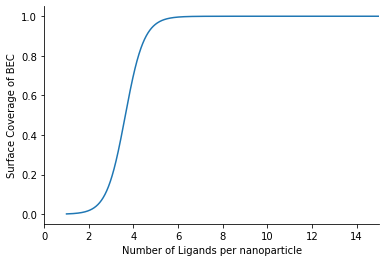

In [34]:
from pprint import pprint
from numpy import exp
# print(f'G_cnf {Gcnf}')
print(f'GMob: {Gmob}')
print(f'GPEO: {GPEO}')

plt.xlabel('Number of Ligands per nanoparticle')
plt.ylabel('Surface Coverage of BEC')
plt.xlim(0,15)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.plot(nL, theta)